In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import support

data = support.get_data()

In [ ]:
param_grid_GradientBoostingClassifier = {
    "n_estimators": np.linspace(250, 1000, 4, dtype=int),
    "learning_rate": [0.01, 0.1],
    "max_depth": [3, 4],
    "random_state": [1],
}

param_grid_RandomForestClassifier = {
    "n_estimators": np.linspace(800, 1300, 3, dtype=int),
    "max_depth": np.linspace(20, 50, 4, dtype=int),
    "min_samples_split": [2, 5],
    "n_jobs": [-1],
    "random_state": [1],
}

# Baseline Gradient Boosting
A gradient boosting model for classification has an accuracy score of **0.7844**.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = support.get_scaled_data(support.get_data())

grid_search_GradientBoostingClassifier = GridSearchCV(GradientBoostingClassifier(), param_grid_GradientBoostingClassifier, cv=5, n_jobs=-1, verbose=3)

grid_search_GradientBoostingClassifier.fit(X_train, y_train)

best_params = grid_search_GradientBoostingClassifier.best_params_
best_score = grid_search_GradientBoostingClassifier.best_score_
best_estimator = grid_search_GradientBoostingClassifier.best_estimator_

print(f'GradientBoostingClassifier best parameters: {best_params}')
print(f'GradientBoostingClassifier best score: {best_score}')

scores['baseline_GradientBoostingClassifier'] = (best_score, best_estimator.score(X_test, y_test))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
GradientBoostingClassifier best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': np.int64(1000), 'random_state': 1}
GradientBoostingClassifier best score: 0.7733835974396471


# Baseline Random Forest
A random forest model for classification has an accuracy score of **0.7616**.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = support.get_scaled_data(support.get_data())

grid_search_RandomForestClassifier = GridSearchCV(RandomForestClassifier(), param_grid_RandomForestClassifier, cv=5, n_jobs=-1, verbose=3)

grid_search_RandomForestClassifier.fit(X_train, y_train)

best_params = grid_search_RandomForestClassifier.best_params_
best_score = grid_search_RandomForestClassifier.best_score_
best_estimator = grid_search_RandomForestClassifier.best_estimator_

print(f'RandomForestClassifier best parameters: {best_params}')
print(f'RandomForestClassifier best score: {best_score}')

scores['baseline_RandomForestClassifier'] = (best_score, best_estimator.score(X_test, y_test))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
RandomForestClassifier best parameters: {'max_depth': np.int64(20), 'min_samples_split': 2, 'n_estimators': np.int64(800), 'n_jobs': -1, 'random_state': 1}
RandomForestClassifier best score: 0.7733863943295056


# Data Preprocessing
Multi-class columns are converted to binary columns using one-hot encoding. Float and integer columns are standardized. The data is then split into training and testing sets.

Look in support.py for the code used to preprocess the data.

# Gradient Boosting post-preprocessing

In [ ]:
X_train, X_test, y_train, y_test, preprocessor = support.get_preprocessed_data(support.get_data())

# comment out this line to run all the hyperparameter tuning listed above.
# it will be slow
param_grid_GradientBoostingClassifier = {'learning_rate': [0.01], 'max_depth': [4], 'n_estimators': [762], 'random_state': [1]}

grid_search_GradientBoostingClassifier = GridSearchCV(GradientBoostingClassifier(), param_grid_GradientBoostingClassifier, cv=5, n_jobs=-1, verbose=3)

grid_search_GradientBoostingClassifier.fit(X_train, y_train)

best_params = grid_search_GradientBoostingClassifier.best_params_
best_score = grid_search_GradientBoostingClassifier.best_score_
best_estimator = grid_search_GradientBoostingClassifier.best_estimator_

print(f'GradientBoostingClassifier best parameters: {best_params}')
print(f'GradientBoostingClassifier best score: {best_score}')

scores['post_preprocessing_GradientBoostingClassifier'] = (best_score, best_estimator.score(X_test, y_test))


Shape of X before OneHot Encoding and Standardizing: (4424, 36)
Shape of X after OneHot Encoding and Standardizing: (4424, 262)
Fitting 5 folds for each of 1 candidates, totalling 5 fits
GradientBoostingClassifier best parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 762, 'random_state': 1}
GradientBoostingClassifier best score: 0.7753617976809787


# Random Forest post-preprocessing

In [ ]:
X_train, X_test, y_train, y_test, preprocessor = support.get_preprocessed_data(support.get_data())

grid_search_RandomForestClassifier = GridSearchCV(RandomForestClassifier(), param_grid_RandomForestClassifier, cv=5, n_jobs=-1, verbose=3)

grid_search_RandomForestClassifier.fit(X_train, y_train)

best_params = grid_search_RandomForestClassifier.best_params_
best_score = grid_search_RandomForestClassifier.best_score_
best_estimator = grid_search_RandomForestClassifier.best_estimator_

print(f'RandomForestClassifier best parameters: {best_params}')
print(f'RandomForestClassifier best score: {best_score}')

scores['post_preprocessing_RandomForestClassifier'] = (best_score, best_estimator.score(X_test, y_test))

Shape of X before OneHot Encoding and Standardizing: (4424, 36)
Shape of X after OneHot Encoding and Standardizing: (4424, 262)
Fitting 5 folds for each of 24 candidates, totalling 120 fits
RandomForestClassifier best parameters: {'max_depth': np.int64(40), 'min_samples_split': 2, 'n_estimators': np.int64(1300), 'n_jobs': -1, 'random_state': 1}
RandomForestClassifier best score: 0.7733899903307522


# PCA for Dimensionality Reduction
I'll begin by using PCA to identify the number of features to explain 99% of variance. I'll then use this number of features in the subsquent models.

Shape of X before OneHot Encoding and Standardizing: (4424, 36)
Shape of X after OneHot Encoding and Standardizing: (4424, 262)


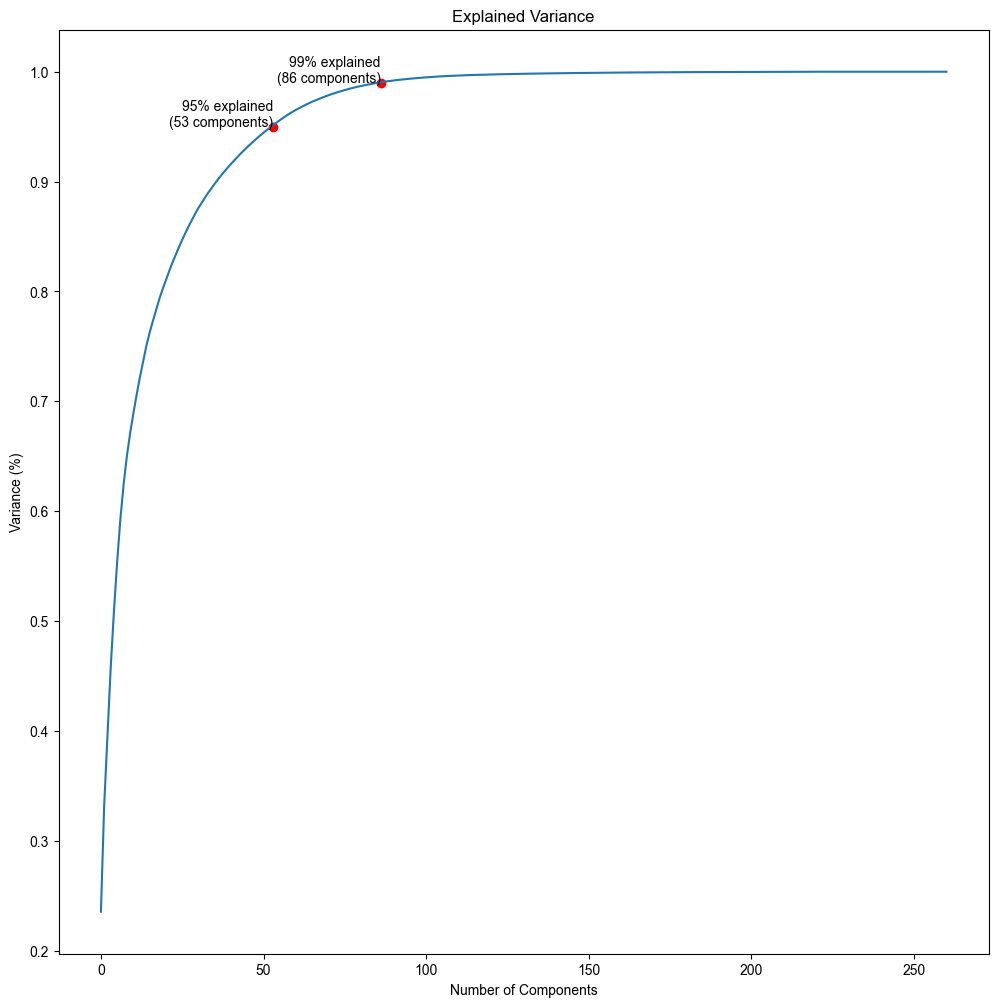

In [ ]:
# PCA

from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test, preprocessor = support.get_preprocessed_data(support.get_data())
pca = PCA()
X_pca = pca.fit_transform(X_train)

explained_variance_95 = np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.95)
explained_variance_99 = np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.99)

plt.figure(figsize=(12, 12))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.scatter(explained_variance_95, 0.95, color="red")
plt.text(explained_variance_95, 0.95, f"95% explained\n({explained_variance_95} components)", ha="right")
plt.scatter(explained_variance_99, 0.99, color="red")
plt.text(explained_variance_99, 0.99, f"99% explained\n({explained_variance_99} components)", ha="right")
plt.xlabel("Number of Components")
plt.ylabel("Variance (%)")
plt.title("Explained Variance")
plt.savefig("explained_variance.png")


In [ ]:
X_train, X_test, y_train, y_test, preprocessor = support.get_preprocessed_data(support.get_data())

pca = PCA(n_components=explained_variance_99)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

param_grid_GradientBoostingClassifier = {'learning_rate': [0.1], 'max_depth': [3], 'n_estimators': [287], 'random_state': [1]}

grid_search_GradientBoostingClassifier = GridSearchCV(GradientBoostingClassifier(), param_grid_GradientBoostingClassifier, cv=5, n_jobs=-1,verbose=3)

grid_search_GradientBoostingClassifier.fit(X_train, y_train)

best_params = grid_search_GradientBoostingClassifier.best_params_
best_score = grid_search_GradientBoostingClassifier.best_score_
best_estimator = grid_search_GradientBoostingClassifier.best_estimator_

print(f'GradientBoostingClassifier best parameters: {best_params}')
print(f'GradientBoostingClassifier best score: {best_score}')

scores['post_pca_GradientBoostingClassifier'] = (best_score, best_estimator.score(X_test, y_test))



Shape of X before OneHot Encoding and Standardizing: (4424, 36)
Shape of X after OneHot Encoding and Standardizing: (4424, 262)
Fitting 5 folds for each of 1 candidates, totalling 5 fits
GradientBoostingClassifier best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 287, 'random_state': 1}
GradientBoostingClassifier best score: 0.7615163937701277


In [ ]:
X_train, X_test, y_train, y_test, preprocessor = support.get_preprocessed_data(support.get_data())

pca = PCA(n_components=explained_variance_99)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# comment out this line to run all the hyperparameter tuning listed above
param_grid_RandomForestClassifier = {'learning_rate': [0.1], 'max_depth': [3], 'n_estimators': [287], 'random_state': [1]}

grid_search_RandomForestClassifier = GridSearchCV(RandomForestClassifier(), param_grid_RandomForestClassifier, cv=5, n_jobs=-1, verbose=3)

grid_search_RandomForestClassifier.fit(X_train, y_train)

best_params = grid_search_RandomForestClassifier.best_params_
best_score = grid_search_RandomForestClassifier.best_score_
best_estimator = grid_search_RandomForestClassifier.best_estimator_

print(f'RandomForestClassifier best parameters: {best_params}')
print(f'RandomForestClassifier best score: {best_score}')

scores['post_pca_RandomForestClassifier'] = (best_score, best_estimator.score(X_test, y_test))


Shape of X before OneHot Encoding and Standardizing: (4424, 36)
Shape of X after OneHot Encoding and Standardizing: (4424, 262)
Fitting 5 folds for each of 24 candidates, totalling 120 fits
RandomForestClassifier best parameters: {'max_depth': np.int64(30), 'min_samples_split': 2, 'n_estimators': np.int64(1050), 'n_jobs': -1, 'random_state': 1}
RandomForestClassifier best score: 0.7581245654831826
